In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',100) # güncellenmiş max_columns

In [2]:
from twython import Twython
CONSUMER_KEY = "0pJRCT1emkOcrtxHl7lMN4N5A"
               
CONSUMER_SECRET = "IS4Gxcx1aQ1c5Hyei5PSePLS37IcVmYBT8Qt1t4IOxmLIxJD42"

twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

In [3]:
twitter

<Twython: 0pJRCT1emkOcrtxHl7lMN4N5A>

In [4]:
help(Twython.search)

Help on function search in module twython.endpoints:

search(self, **params)
    Returns a collection of relevant Tweets matching a specified query.
    
    Docs:
    https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets



In [5]:
results = twitter.search(q="data science", count=200)

In [6]:
results

{'statuses': [{'created_at': 'Thu Aug 11 18:33:35 +0000 2022',
   'id': 1557797392698818573,
   'id_str': '1557797392698818573',
   'text': 'RT @Sstainblesailtd: This is a really interesting piece of work, using an \n@VendeeGlobeENG IMOCA to collect marine science data : https://t…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'Sstainblesailtd',
      'name': 'Sustainablesailingltd',
      'id': 1440030682533687297,
      'id_str': '1440030682533687297',
      'indices': [3, 19]},
     {'screen_name': 'VendeeGlobeENG',
      'name': '🇬🇧 Vendée Globe',
      'id': 1111272467698466816,
      'id_str': '1111272467698466816',
      'indices': [75, 90]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': N

In [7]:
all = results['statuses']

In [8]:
import pandas as pd
tweet_df = pd.DataFrame(all)

In [9]:
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Thu Aug 11 18:33:35 +0000 2022,1557797392698818573,1557797392698818573,RT @Sstainblesailtd: This is a really interest...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1183729855705341952, 'id_str': '1183729...",None,None,None,None,{'created_at': 'Thu Aug 11 18:33:20 +0000 2022...,False,1,0,False,False,False,en,NaN,NaN,NaN,NaN
1,Thu Aug 11 18:33:27 +0000 2022,1557797358263341056,1557797358263341056,RT @isabelfulcher: Excited to *accelerate* our...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 43851449, 'id_str': '43851449', 'name':...",None,None,None,None,{'created_at': 'Wed Aug 10 21:46:38 +0000 2022...,False,2,0,False,False,NaN,en,NaN,NaN,NaN,NaN
2,Thu Aug 11 18:33:24 +0000 2022,1557797345344950272,1557797345344950272,RT @Sumanth_077: Data Visualization is importa...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1186634853657133056, 'id_str': '1186634...",None,None,None,None,{'created_at': 'Thu Aug 11 07:01:01 +0000 2022...,False,184,0,False,False,NaN,en,NaN,NaN,NaN,NaN
3,Thu Aug 11 18:33:20 +0000 2022,1557797327934574594,1557797327934574594,"This is a really interesting piece of work, us...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 1440030682533687297, 'id_str': '1440030...",None,None,None,None,NaN,False,1,0,False,False,False,en,NaN,NaN,NaN,NaN
4,Thu Aug 11 18:33:16 +0000 2022,1557797313933893632,1557797313933893632,@MemoonaRasheed2 Why? What's troubling you in ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.557797e+18,1557796576873021442,2.574903e+09,2574903373,MemoonaRasheed2,"{'id': 1444370631055785988, 'id_str': '1444370...",None,None,"{'id': '00cc0d5640394308', 'url': 'https://api...",None,NaN,False,0,0,False,False,NaN,en,NaN,NaN,NaN,NaN


In [10]:
tweet_user = pd.DataFrame([d["user"] for d in results["statuses"]])
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,1183729855705341952,1183729855705341952,Joe Penhaul Smith,JoePenhaul,,MD of @Sstainblesailtd. Algal Bioproduction re...,None,{'description': {'urls': []}},False,154,848,0,Mon Oct 14 13:02:51 +0000 2019,888,None,None,False,False,268,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1183730001...,https://pbs.twimg.com/profile_images/118373000...,https://pbs.twimg.com/profile_banners/11837298...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
1,43851449,43851449,Priyanka Vaidya 🇮🇳 🇦🇺 🇺🇸,priyankavaidya,"California, USA",Chief Product Officer @DelfinaCare| Biomedical...,https://t.co/phL9b51dme,{'url': {'urls': [{'url': 'https://t.co/phL9b5...,False,298,1433,77,Mon Jun 01 08:02:18 +0000 2009,643,None,None,True,False,559,None,False,False,False,ACDED6,http://abs.twimg.com/images/themes/theme18/bg.gif,https://abs.twimg.com/images/themes/theme18/bg...,False,http://pbs.twimg.com/profile_images/6182321732...,https://pbs.twimg.com/profile_images/618232173...,https://pbs.twimg.com/profile_banners/43851449...,167485,EEEEEE,F6F6F6,333333,True,False,False,False,None,None,None,none,[]
2,1186634853657133056,1186634853657133056,XYZ,MYV26930948,,,None,{'description': {'urls': []}},False,84,111,0,Tue Oct 22 13:27:11 +0000 2019,7327,None,None,False,False,41731,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1376498118...,https://pbs.twimg.com/profile_images/137649811...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
3,1440030682533687297,1440030682533687297,Sustainablesailingltd,Sstainblesailtd,,Building the path to Net Zero for the marine i...,None,{'description': {'urls': []}},False,5,58,0,Mon Sep 20 19:11:01 +0000 2021,0,None,None,False,False,4,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1446214695...,https://pbs.twimg.com/profile_images/144621469...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]
4,1444370631055785988,1444370631055785988,Havi,Havi_635,,"A hopeless romantic, tech nerd, someone who ma...",None,{'description': {'urls': []}},False,429,924,0,Sat Oct 02 18:36:34 +0000 2021,87026,None,None,True,False,6451,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1553325301...,https://pbs.twimg.com/profile_images/155332530...,https://pbs.twimg.com/profile_banners/14443706...,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]


In [11]:
twitter_df = tweet_df.merge(tweet_user, left_index=True, right_index=True) # birleştirme

In [12]:
twitter_df.shape

(100, 73)

<AxesSubplot:>

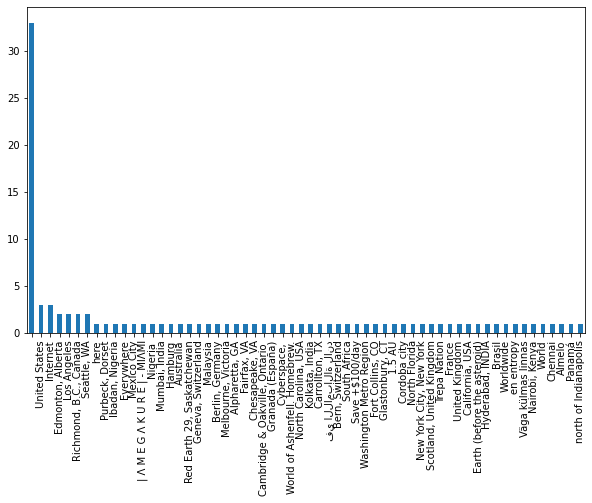

In [13]:
twitter_df.location.value_counts().plot(kind="bar", figsize=(10,6))

In [14]:
user_screenname = []
user_location = []
user_name = []
user_tz = []
tweet_text = []
tweet_tm = []

In [15]:
for status in twitter.search(q = "Datascience", result_type = "popular",
                             lang = "en",count = 200)["statuses"]:
    user = status["user"]["screen_name"]
    text = status["text"]
    tm = status["created_at"]        
    loc = status["user"]["location"]
    nm = status["user"]["name"]
    tz = status["user"]["time_zone"]
    
    print()
    print(user,"--",loc,"--",nm,"--",tm,"--",text)
    print()

    user_screenname.append(user)
    user_location.append(loc)
    user_name.append(nm)
    user_tz.append(tz)
    tweet_text.append(text)
    tweet_tm.append(tm)    


KirkDBorne -- Maryland, USA -- Kirk Borne -- Thu Aug 11 03:26:07 +0000 2022 -- 700-page PDF — #Algorithms for Decision-Making — download brilliant &amp; comprehensive FREE eBook from MIT:… https://t.co/XXUmg9Zfbh


KirkDBorne -- Maryland, USA -- Kirk Borne -- Thu Aug 11 03:25:10 +0000 2022 -- 10-page PDF covers a semester's worth of introductory probability —⭐️The best and only #Probability Cheat Sheet tha… https://t.co/5GUWTLALpF


KirkDBorne -- Maryland, USA -- Kirk Borne -- Thu Aug 11 03:53:50 +0000 2022 -- J.P.Morgan’s Comprehensive 280-page Guide to #MachineLearning (with #Python code for popular #ML #algorithms)… https://t.co/PGQzRpJRd0


DataSciCampus -- United Kingdom -- Data Science Campus -- Thu Aug 11 14:32:57 +0000 2022 -- How are rail schedules across Great Britain affected by potential service disruptions? We visualise them for the ne… https://t.co/AlVAfFr3yQ


stratorob -- Hamburg -- Dr. Robin Kiera -- Thu Aug 11 08:40:47 +0000 2022 -- #Decentraland, #ApeCoin and #Hachi

In [16]:
test = twitter_df[["created_at_x","text"]]
test.head()

,created_at_x,text
0,Thu Aug 11 18:33:35 +0000 2022,RT @Sstainblesailtd: This is a really interest...
1,Thu Aug 11 18:33:27 +0000 2022,RT @isabelfulcher: Excited to *accelerate* our...
2,Thu Aug 11 18:33:24 +0000 2022,RT @Sumanth_077: Data Visualization is importa...
3,Thu Aug 11 18:33:20 +0000 2022,"This is a really interesting piece of work, us..."
4,Thu Aug 11 18:33:16 +0000 2022,@MemoonaRasheed2 Why? What's troubling you in ...


In [17]:
test.drop("created_at_x",axis=1, inplace=True)
test.rename(columns={"text":"SentimentText"},inplace=True) # column name değiştirme
test.index.names=["ItemID"] # 
test.head()

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1157655512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop("created_at_x",axis=1, inplace=True)
C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1157655512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.rename(columns={"text":"SentimentText"},inplace=True) # column name değiştirme


,SentimentText
ItemID,
0,RT @Sstainblesailtd: This is a really interest...
1,RT @isabelfulcher: Excited to *accelerate* our...
2,RT @Sumanth_077: Data Visualization is importa...
3,"This is a really interesting piece of work, us..."
4,@MemoonaRasheed2 Why? What's troubling you in ...


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SentimentText  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [19]:
test.head()

,SentimentText
ItemID,
0,RT @Sstainblesailtd: This is a really interest...
1,RT @isabelfulcher: Excited to *accelerate* our...
2,RT @Sumanth_077: Data Visualization is importa...
3,"This is a really interesting piece of work, us..."
4,@MemoonaRasheed2 Why? What's troubling you in ...


In [20]:
test.tail()

,SentimentText
ItemID,
95,RT @SA_Diabetes: Ricardo Samms et al uncover a...
96,RT @mathvsoldage: My bosses are hiring! PhD in...
97,#science #data #datascience \nhttps://t.co/Cns...
98,RT @Al_Grigor: Tools that cover 90% of data sc...
99,RT @nowthisnews: A study published Wednesday i...


In [21]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
test["Sentiment"]=test.SentimentText.apply(detect_sentiment)

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\605866933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sentiment"]=test.SentimentText.apply(detect_sentiment)


In [23]:
test.Sentiment.value_counts()

 0.000000    43
 0.500000     7
 0.062500     6
 0.562500     6
-0.271429     4
-0.600000     2
 0.100000     2
 0.800000     2
 1.000000     2
 0.200000     2
 0.250000     1
 0.366667     1
-0.166667     1
 0.700000     1
-0.400000     1
 0.059091     1
 0.550000     1
 0.200000     1
-0.012500     1
 0.109375     1
 0.033333     1
 0.600000     1
 0.212121     1
 0.037273     1
 0.468750     1
 0.375000     1
 0.666667     1
 0.400000     1
 0.400000     1
 0.144444     1
 0.406250     1
-0.150000     1
 0.164286     1
 0.321591     1
Name: Sentiment, dtype: int64

In [24]:
df=test

In [25]:
df.SentimentText.duplicated().sum()

28

In [26]:
df.drop_duplicates(subset="SentimentText", inplace=True) # tekrar edenleri sil
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 97
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SentimentText  72 non-null     object 
 1   Sentiment      72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1115135664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset="SentimentText", inplace=True) # tekrar edenleri sil


In [27]:
df["removal_char"]=df["SentimentText"].str.replace("[^a-zA-Z0-9\s]",'') 
df.head()

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1792863948.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["removal_char"]=df["SentimentText"].str.replace("[^a-zA-Z0-9\s]",'')
C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1792863948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["removal_char"]=df["SentimentText"].str.replace("[^a-zA-Z0-9\s]",'')


,SentimentText,Sentiment,removal_char
ItemID,,,
0,RT @Sstainblesailtd: This is a really interest...,0.50000,RT Sstainblesailtd This is a really interestin...
1,RT @isabelfulcher: Excited to *accelerate* our...,0.46875,RT isabelfulcher Excited to accelerate our dat...
2,RT @Sumanth_077: Data Visualization is importa...,0.20000,RT Sumanth077 Data Visualization is important ...
3,"This is a really interesting piece of work, us...",0.50000,This is a really interesting piece of work usi...
4,@MemoonaRasheed2 Why? What's troubling you in ...,0.00000,MemoonaRasheed2 Why Whats troubling you in Dat...


In [28]:
import nltk 
from nltk import word_tokenize

In [29]:
df.removal_char = df.removal_char.apply(lambda x: word_tokenize(x.lower()))

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1066409915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.removal_char = df.removal_char.apply(lambda x: word_tokenize(x.lower()))


In [30]:
TextBlob("I am very happy").sentiment.polarity

1.0

In [31]:
import seaborn as sns

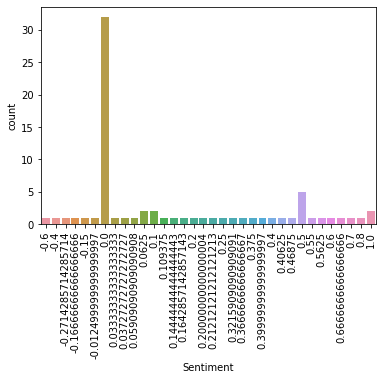

In [32]:
sns.countplot(x=df["Sentiment"])
plt.xticks(rotation=90);

In [33]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords 

In [34]:
stop_words=list(stopwords.words("english"))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
df["stopword_removal"] = df["removal_char"].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\3703351281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stopword_removal"] = df["removal_char"].apply(lambda x: [word for word in x if word not in stop_words])


,SentimentText,Sentiment,removal_char,stopword_removal
ItemID,,,,
0,RT @Sstainblesailtd: This is a really interest...,0.50000,"[rt, sstainblesailtd, this, is, a, really, int...","[rt, sstainblesailtd, really, interesting, pie..."
1,RT @isabelfulcher: Excited to *accelerate* our...,0.46875,"[rt, isabelfulcher, excited, to, accelerate, o...","[rt, isabelfulcher, excited, accelerate, data,..."
2,RT @Sumanth_077: Data Visualization is importa...,0.20000,"[rt, sumanth077, data, visualization, is, impo...","[rt, sumanth077, data, visualization, importan..."
3,"This is a really interesting piece of work, us...",0.50000,"[this, is, a, really, interesting, piece, of, ...","[really, interesting, piece, work, using, vend..."
4,@MemoonaRasheed2 Why? What's troubling you in ...,0.00000,"[memoonarasheed2, why, whats, troubling, you, ...","[memoonarasheed2, whats, troubling, data, scie..."


In [36]:
df["stopword_removal"] = df["stopword_removal"].apply(lambda x: " ".join(x)) # kelimleri birleştirdik

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1338667437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stopword_removal"] = df["stopword_removal"].apply(lambda x: " ".join(x)) # kelimleri birleştirdik


In [37]:
from nltk import WordNetLemmatizer # kök bulma
df["stopword_removal"]=df["stopword_removal"].apply(lambda x : WordNetLemmatizer().lemmatize(x))

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\3650047653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stopword_removal"]=df["stopword_removal"].apply(lambda x : WordNetLemmatizer().lemmatize(x))


In [38]:
df["sentiment_polarity"]=df["stopword_removal"].apply(lambda x : TextBlob(x).sentiment.polarity)

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\3859177661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_polarity"]=df["stopword_removal"].apply(lambda x : TextBlob(x).sentiment.polarity)


In [39]:
df["sentiment_subjectivity"]=df["stopword_removal"].apply(lambda x : TextBlob(x).sentiment.subjectivity)

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1901514203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_subjectivity"]=df["stopword_removal"].apply(lambda x : TextBlob(x).sentiment.subjectivity)


In [40]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [41]:
vect=CountVectorizer()
X=vect.fit_transform(df["stopword_removal"])

In [42]:
X.shape

(72, 648)

In [43]:
df.head(20)

,SentimentText,Sentiment,removal_char,stopword_removal,sentiment_polarity,sentiment_subjectivity
ItemID,,,,,,
0,RT @Sstainblesailtd: This is a really interest...,0.500000,"[rt, sstainblesailtd, this, is, a, really, int...",rt sstainblesailtd really interesting piece wo...,0.500000,0.500000
1,RT @isabelfulcher: Excited to *accelerate* our...,0.468750,"[rt, isabelfulcher, excited, to, accelerate, o...",rt isabelfulcher excited accelerate data scien...,0.375000,0.750000
2,RT @Sumanth_077: Data Visualization is importa...,0.200000,"[rt, sumanth077, data, visualization, is, impo...",rt sumanth077 data visualization important dat...,0.200000,1.000000
3,"This is a really interesting piece of work, us...",0.500000,"[this, is, a, really, interesting, piece, of, ...",really interesting piece work using vendeeglob...,0.500000,0.500000
4,@MemoonaRasheed2 Why? What's troubling you in ...,0.000000,"[memoonarasheed2, why, whats, troubling, you, ...",memoonarasheed2 whats troubling data science,0.000000,0.000000
5,100+ Exercises – Python – Data Science – NumPy...,0.164286,"[100, exercises, python, data, science, numpy,...",100 exercises python data science numpy 2022 f...,0.164286,0.471429
6,RT @VirusesImmunity: There are multiple hypoth...,-0.150000,"[rt, virusesimmunity, there, are, multiple, hy...",rt virusesimmunity multiple hypotheses behind ...,-0.150000,0.366667
7,RT @SA_Diabetes: Ricardo Samms et al uncover a...,0.500000,"[rt, sadiabetes, ricardo, samms, et, al, uncov...",rt sadiabetes ricardo samms et al uncover inte...,0.500000,0.500000
8,"Meet Tallan Data Science Lead, Andrew Kraemer!...",0.406250,"[meet, tallan, data, science, lead, andrew, kr...",meet tallan data science lead andrew kraemer i...,0.250000,0.500000


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [45]:
nb = MultinomialNB()
log = LogisticRegression()
dtc = DecisionTreeClassifier()

In [46]:
def tweet_sentence(score): 
    if score>0.2: 
        return 2 
    elif score<-0.2: 
        return 0 
    else: 
        return 1 
df["class"]=df["sentiment_polarity"].apply(lambda x: tweet_sentence(x)) 

C:\Users\bilal\AppData\Local\Temp\ipykernel_14024\1969666259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class"]=df["sentiment_polarity"].apply(lambda x: tweet_sentence(x))


In [47]:
x=df["stopword_removal"]
y=df["class"]

In [48]:
x_dtm=vect.fit_transform(x)

In [49]:
x_dtm.shape

(72, 648)

In [50]:
algorithms = [nb, log, dtc]
names = ['MultinomialNB', 'LogisticRegression', 'DecisionTreeClassifier'] 
def classification(): 
    accuracy = [] 
    precision = [] 
    recall = [] 
    f1 =[] 
    for i in range(len(algorithms)):
        algorithms[i].fit(x_dtm, y) 
    for i in range(len(algorithms)): 
        accuracy.append(accuracy_score(y, algorithms[i].predict(x_dtm))) 
        precision.append(precision_score(y, algorithms[i].predict(x_dtm),average="weighted")) 
        recall.append(recall_score(y, algorithms[i].predict(x_dtm),average="weighted")) 
        f1.append(f1_score(y, algorithms[i].predict(x_dtm),average="weighted")) 
   
    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names) 
    met['Accuracy'] = accuracy 
    met['Precision'] = precision 
    met['Recall'] = recall 
    met["F1"] = f1 
    return met 

In [51]:
classification() 

,Accuracy,Precision,Recall,F1
MultinomialNB,1.0,1.0,1.0,1.0
LogisticRegression,1.0,1.0,1.0,1.0
DecisionTreeClassifier,1.0,1.0,1.0,1.0
